In [244]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import ops

In [297]:
data = pd.read_excel('Final Dataset.xlsx', index_col=0)

In [298]:
data = data[data['Volume_PKO'] > 0]

In [ ]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

exogenous = data[['Close_1YBond', 'Close_10YBond', 'Unemployment rate', 'Money supply (M2)', 
    'Reference rate', 'CPI',
    'GDP per capita USD', 'Close_EUR/PLN', 'Close_Gold', 'Close_Oil',
    'Close_USD/PLN', 'Close_VIX']]

stocks = data.loc[:, :'Trading range_sWIG80']

pko = stocks['Close_PKO']
pko_exo = pd.concat((stocks[['Volume_PKO', 'Trading range_PKO']],exogenous), axis=1)

In [320]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

exogenous = data[['Close_10YBond', 
    'Close_EUR/PLN', 'Close_Gold', 'Close_Oil',
    'Close_USD/PLN', 'Close_VIX']]

stocks = data.loc[:, :'Trading range_sWIG80']

pko = stocks['Close_PKO']
# pko_exo = pd.concat((stocks[['Volume_PKO', 'Trading range_PKO']],exogenous), axis=1)

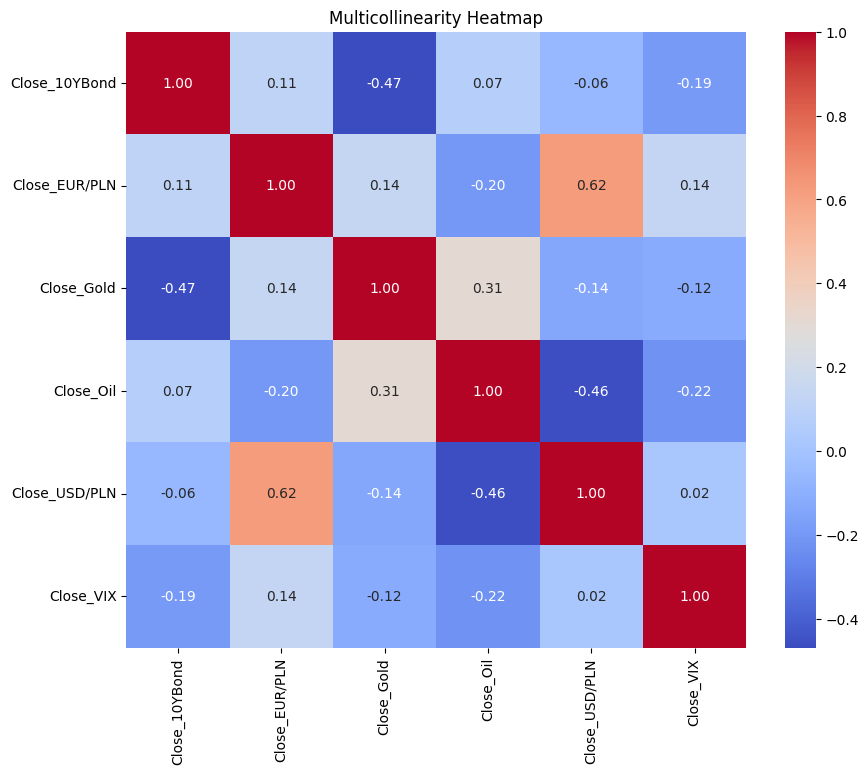

In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load your dataframe
# df = pd.read_csv('your_data.csv')

# Compute the correlation matrix
correlation_matrix = exogenous.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Set the title
plt.title('Multicollinearity Heatmap')
plt.show()


In [294]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

pko_exo = data[['Close_1YBond', 'Close_Gold', 'Close_Oil']]

stocks = data.loc[:, :'Trading range_sWIG80']

pko = stocks['Close_PKO']
# pko_exo = pd.concat((stocks[['Volume_PKO', 'Trading range_PKO']],pko_exo), axis=1)

In [282]:
X = pko_exo.values
y = pko.values


In [323]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import Input

X_train = pko_exo[pko.index < "2019-01-01"].values
X_test = pko_exo[pko.index >= "2019-01-01"].values
y_train =  pko[pko.index < "2019-01-01"].values
y_test = pko[pko.index >= "2019-01-01"].values


from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Initialize the model
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu',),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Rolling prediction
rolling_predictions = []
history_X = list(X_train)
history_y = list(y_train)

for i in range(len(X_test)):
    # Prepare the input data for prediction
    input_data = np.array([X_test[i]])
    
    # Make prediction
    yhat = model.predict(input_data, verbose=0)
    
    # Store prediction
    rolling_predictions.append(yhat[0][0])
    
    # Update history with the predicted value
    history_X.append(X_test[i])
    history_y.append(yhat[0][0])

# Convert rolling_predictions to a numpy array for further analysis
rolling_predictions = np.array(rolling_predictions)

# Print rolling predictions
print(rolling_predictions)

[ -1702.1946   -2301.83     -2801.0652   -3936.2463   -4796.818
  -4668.0713   -5183.747    -6495.9478   -2627.5747   -4022.1123
  -2887.2957   -4643.914    -9750.879    -1345.5957   -3467.9514
  -5912.5195   -3687.9558   -5155.9146   -7187.9478   -3163.5234
  -4341.889    -3683.2659   -1095.497    -1612.046    -1661.9801
  -1887.697    -1593.9191   -2697.6987   -1666.9551   -1502.1132
  -2081.6191   -1624.5712   -2375.3247   -1620.1444   -3208.0159
  -2192.491    -2404.0764   -2460.99     -2945.7368   -3269.85
  -2479.4612   -4872.9395   -5597.3716   -3095.119    -2135.301
  -3776.8147   -2995.7449   -1269.9088   -2116.4902   -1786.2815
  -1927.3748   -1005.4505   -7553.3813   -1529.3237   -1425.541
  -1911.9695   -1612.1606   -2281.6338   -1312.9814   -1140.1178
  -1716.546     -750.67426  -1949.2666   -1459.9724   -1332.4012
  -1879.0851   -4310.6646   -2725.6318    -852.75085  -2575.3652
  -2529.8792   -1831.0881   -1439.5381   -1589.0605   -2299.1768
  -2303.006    -2325.7317   -1

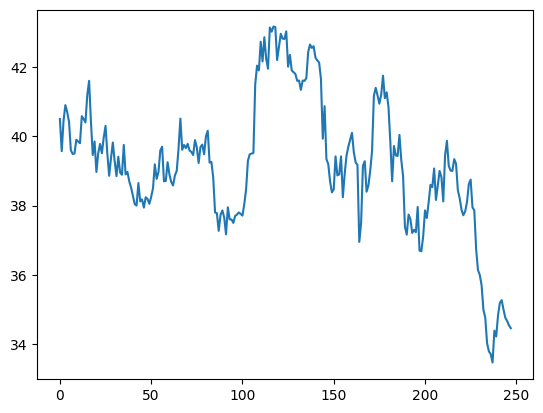

In [292]:
plt.plot(y_test)

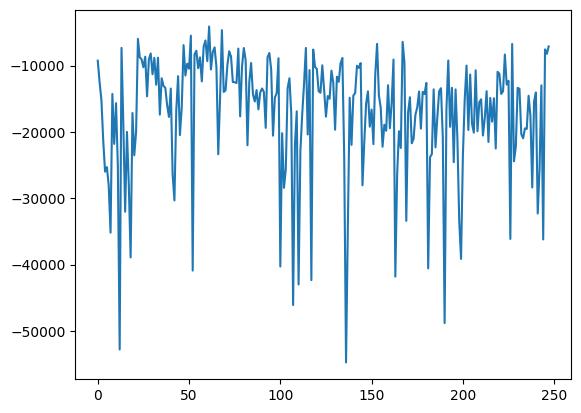

In [293]:
plt.plot(rolling_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


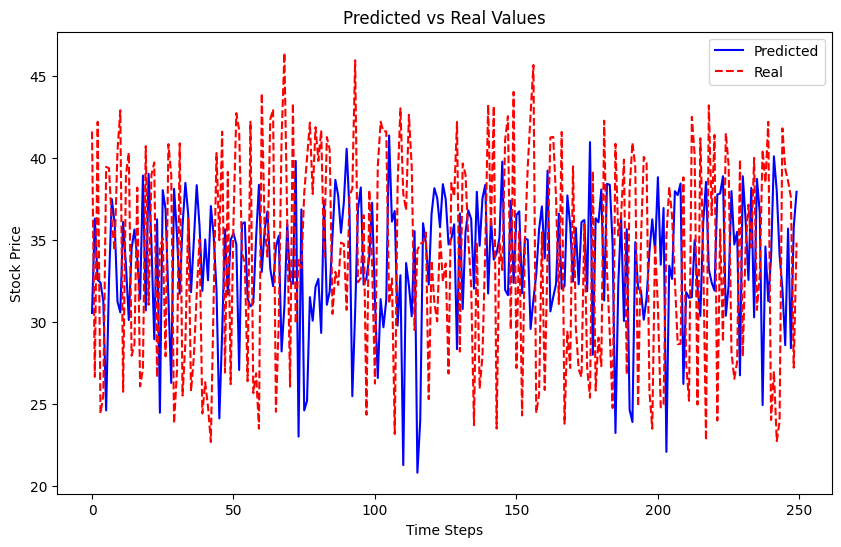

In [255]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split your data into train and test sets
# X, y should be defined previously, where X is your features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Make predictions on the test set
predictions = model.predict(X_test)

# Flatten the predictions and real values
predictions = np.array(predictions).flatten()
real_values = np.array(y_test).flatten()

# Plotting the predicted vs real values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted', color='blue')
plt.plot(real_values, label='Real', color='red', linestyle='--')
plt.title('Predicted vs Real Values')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


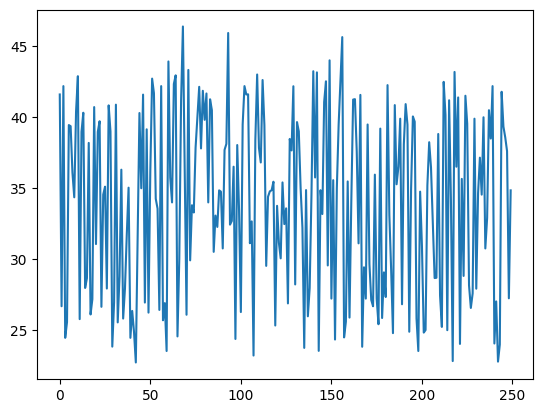

In [258]:
plt.plot(real_values)

c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

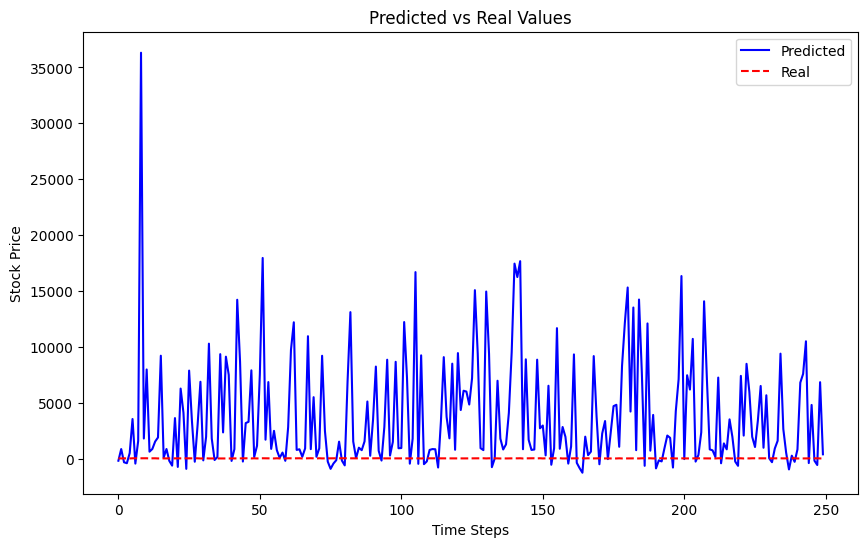

In [240]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = Sequential([
    Dense(64, activation='relu', input_dim=14),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Initialize lists to store predictions and real values
predictions = []
real_values = []

# Loop over the test set to predict one step ahead at a time
for i in range(len(X_test)):
    # Predict the next day's stock price
    next_day_pred = model.predict(X_test[i].reshape(1, -1))
    predictions.append(next_day_pred[0][0])  # Get the scalar value

    # Get the real value from the test set
    real_value = y_test[i]
    real_values.append(real_value)

    # Update X_test with the real value for the next prediction
    # We update the last input with the real value
    X_test[i][-1] = real_value  # Update the last feature with real_value

# Convert predictions and real values to numpy arrays for easier handling
predictions = np.array(predictions)
real_values = np.array(real_values)

# Plotting the predicted vs real values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted', color='blue')
plt.plot(real_values, label='Real', color='red', linestyle='--')
plt.title('Predicted vs Real Values')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


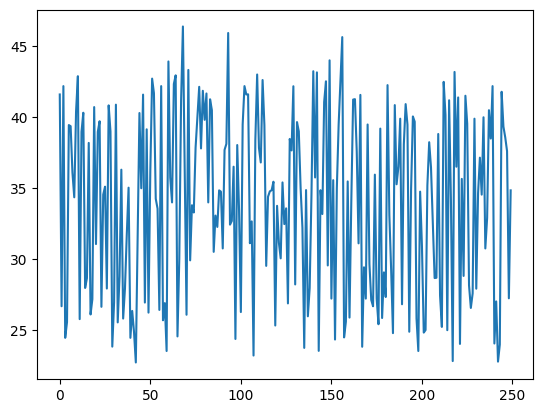

In [246]:
plt.plot(real_values)

In [220]:
X_train = pko_exo[pko.index < "2019-01-01"].values
X_test = pko_exo[pko.index >= "2019-01-01"].values
y_train =  pko[pko.index < "2019-01-01"].values
y_test = pko[pko.index >= "2019-01-01"].values


# initialize the model
model = Sequential([
    Dense(128, activation='sigmoid', input_dim=14),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# initialize a list to store predictions
predictions = []
real_values = []

# Loop over the test set to predict one step ahead at a time
for i in range(len(X_test)):
    # Predict the next day's stock price
    next_day_pred = model.predict(X_test[i].reshape(1, -1))
    predictions.append(next_day_pred[0][0])  # Get the scalar value

    # Get the real value from the test set
    real_value = y_test[i]
    real_values.append(real_value)

    # Update X_test with the real value for the next prediction
    # We update the last input with the real value
    X_test[i][-1] = real_value  # Update the last feature with real_value

# Convert predictions and real values to numpy arrays for easier handling
predictions = np.array(predictions)
real_values = np.array(real_values)


plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted', color='blue')
plt.plot(real_values, label='Real', color='red', linestyle='--')
plt.title('Predicted vs Real Values')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


NameError: name 'HeNormal' is not defined

In [219]:
predictions

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [148]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_shape),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer (predicting next day's stock price)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model on training data
def train_model(X_train, y_train):
    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    return model

# Rolling prediction function
def rolling_predict(model, X_train, y_train, X_test, y_test, time_step=5):
    predictions = []
    
    # Initially train the model on training data
    model = train_model(X_train, y_train)
    
    # Loop over the test set to predict one step ahead at a time
    for i in range(len(X_test)):
        # Predict the next day's stock price
        next_day_pred = model.predict(X_test[i].reshape(1, -1))
        predictions.append(next_day_pred)
        
        # Get the real value from the test set
        real_value = y_test[i]
        
        # Append the real value to the test set for the next prediction
        # Slide the window forward by 1 (update X_test with the real value)
        X_test = np.roll(X_test, shift=-1, axis=0)
        X_test[-1] = np.append(X_test[-1][1:], real_value)  # Update with real value
        y_test = np.roll(y_test, shift=-1)
        y_test[-1] = real_value  # Update y_test with the real value
    
    return predictions

# Example data
data = np.sin(np.linspace(0, 100, 200))  # Simulated sine wave data
time_step = 5
X, y = create_dataset(data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Run rolling prediction
predictions = rolling_predict(None, X_train, y_train, X_test, y_test, time_step)
print("Predictions:", predictions)


c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
def rolling_predict(model, X, y, initial_train_size = 1028, num_predictions = 260):
    predictions = []
    X_train, y_train = X[:initial_train_size], y[:initial_train_size]
    
    for _ in range(num_predictions):
        # Train the model on the current window of data
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Predict the next day's value
        next_day_prediction = model.predict(X_train[-1].reshape(1, -1))
        predictions.append(next_day_prediction)
        
        # Shift the data forward by adding the predicted value to the training set
        X_train = np.append(X_train, [X_train[-1][-1:], axis=0])  # Append the last known value
        y_train = np.append(y_train, next_day_prediction)  # Append the predicted value
        X_train = X_train[1:]  # Remove the oldest data point
        y_train = y_train[1:]  # Remove the oldest target value

    return predictions

In [83]:
evaluation = pd.DataFrame(index = data.index[-258:])
evaluation['Predicted'] = y_pred
evaluation['Actual'] = y_test

In [85]:
evaluation

,Predicted,Actual
2019-01-03,34.780804,37.270000
2019-01-04,34.780804,39.419998
2019-01-07,34.780804,25.709999
2019-01-08,34.780804,35.930000
2019-01-09,34.780804,34.000000
...,...,...
2019-12-24,34.780804,27.709999
2019-12-25,34.780804,39.540001
2019-12-26,34.780804,39.189999
2019-12-27,34.780804,24.350000


In [ ]:
## model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np


def mean_directional_accuracy(y_true, y_pred):
    # calculate the change and compare between true and predicted values
    return np.mean(np.sign(y_true[1:] - y_true[:-1]) == np.sign(y_pred[1:] - y_pred[:-1]))


def hit_rate(y_true, y_pred, tolerance=0.01):

    # make sure the array is 1D
    y_true = np.squeeze(y_true)

    # Calculate the percentage error for each prediction
    error = np.abs(y_true - y_pred) / y_true

    # Count the number of hits (cases where the error is lower than the tolerance)
    hits = np.sum(error <= tolerance)
    
    # Calculate hit rate as a percentage
    hit_rate_percentage = (hits / len(y_true)) * 100
    return hit_rate_percentage



mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mda = mean_directional_accuracy(y_test, y_pred)
hr = hit_rate(y_test, y_pred, tolerance=0.01)  # 1% tolerance


0.17467746596762024

In [137]:


# Example usage:


In [138]:
hr

2.7131782945736433

### Final parts needed


In [ ]:
#1
import random
import numpy as np
import tensorflow as tf

In [ ]:
#1 Set the random seeds to make the model reproducible

random.seed(42)  # Python random
np.random.seed(42)  # NumPy random
tf.random.set_seed(42)  # TensorFlow/Keras random
